### CNN 資料預處理

* 將特徵資料 (樣本數, 28, 28) 形狀轉換成 4D 張量 (樣本數, 28, 28, 1)
* 執行特徵標準化的正規劃
* 將標籤資料執行 one-hot 編碼

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import mnist

seed = 7
np.random.seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")


X_train shape : (60000, 28, 28, 1)
X_test shape : (10000, 28, 28, 1)


In [11]:
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0][150:175])

[]


In [12]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(f"Y_train shape : {Y_train.shape}")

Y_train shape : (60000, 10)


### 建立模型 

In [14]:
model = Sequential()

# 第一組卷積層與池化層
model.add(Conv2D(16, # filters 過濾器數
                 kernel_size = (5, 5), # 過濾器窗格的尺寸 (3,3) or (5,5)
                 padding = "same", # 補零方式，預設參數 valid 是不補零，same是補零成相同尺寸
                 input_shape= (28, 28, 1), activation = "relu")) # strides 步福數預設是(1,1)
model.add(MaxPooling2D(pool_size = (2, 2))) # padding、strides同 conv2D

#第二組卷積層與池化層
model.add(Conv2D(32, kernel_size = (5, 5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# 定義 Dropout、平坦層和連接層
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 128, verbose =2)

Epoch 1/10
375/375 - 23s - loss: 0.4149 - accuracy: 0.8698 - val_loss: 0.0866 - val_accuracy: 0.9743
Epoch 2/10
375/375 - 24s - loss: 0.1404 - accuracy: 0.9567 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 3/10
375/375 - 23s - loss: 0.1043 - accuracy: 0.9685 - val_loss: 0.0474 - val_accuracy: 0.9870
Epoch 4/10
375/375 - 23s - loss: 0.0854 - accuracy: 0.9744 - val_loss: 0.0393 - val_accuracy: 0.9889
Epoch 5/10
375/375 - 23s - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 6/10
375/375 - 23s - loss: 0.0672 - accuracy: 0.9799 - val_loss: 0.0349 - val_accuracy: 0.9906
Epoch 7/10
375/375 - 26s - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0338 - val_accuracy: 0.9912
Epoch 8/10
375/375 - 26s - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0347 - val_accuracy: 0.9904
Epoch 9/10
375/375 - 26s - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0302 - val_accuracy: 0.9913
Epoch 10/10
375/375 - 27s - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0312 - val_accura

In [18]:
loss, accuracy = model.evaluate(X_train, Y_train)
print(f"訓練集的準確度 : {accuracy :.4f}")
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"測試集準確度 : {accuracy :.4f}")

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0187 - accuracy: 0.9940
訓練集的準確度 : 0.9940
313/313 [==============================] - 2s 6ms/step - loss: 0.0238 - accuracy: 0.9918
測試集準確度 : 0.9918


上述驗證資料的準確度是 99.40% ，測試集的準確度是 99.18%。

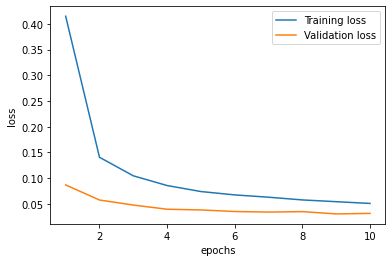

In [20]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

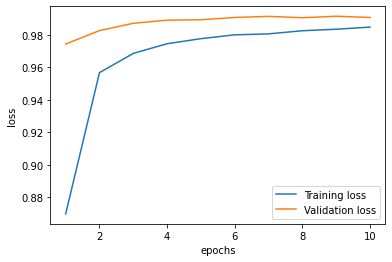

In [23]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, label = "Training loss")
plt.plot(epochs, val_acc, label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

可以看到隨著訓練週期的增加，訓練損失與驗證損失都是持續的減少；訓練準確度與驗證準確度都是持續的提升。

In [30]:
import pandas as pd

seed = 7
np.random.seed(seed)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train / 255
X_test = X_test / 255

Y_test_bk = Y_test.copy() # 備份 Y_test 資料集以做後續預測結果的比對
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

model = Sequential()

# 第一組卷積層與池化層
model.add(Conv2D(16, kernel_size = (5, 5), padding = "same", input_shape= (28, 28, 1), activation = "relu")) 
model.add(MaxPooling2D(pool_size = (2, 2))) 
#第二組卷積層與池化層
model.add(Conv2D(32, kernel_size = (5, 5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# 定義 Dropout、平坦層和連接層
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(X_train, Y_train, epochs = 10, batch_size = 128, verbose =2)

Y_pred = model.predict_classes(X_test)
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int), rownames = ["label"], colnames = ["predict"] )
print(tb)

Epoch 1/10
469/469 - 29s - loss: 0.3452 - accuracy: 0.8913
Epoch 2/10
469/469 - 31s - loss: 0.1154 - accuracy: 0.9655
Epoch 3/10
469/469 - 31s - loss: 0.0901 - accuracy: 0.9731
Epoch 4/10
469/469 - 31s - loss: 0.0716 - accuracy: 0.9783
Epoch 5/10
469/469 - 32s - loss: 0.0651 - accuracy: 0.9800
Epoch 6/10
469/469 - 32s - loss: 0.0574 - accuracy: 0.9829
Epoch 7/10
469/469 - 32s - loss: 0.0557 - accuracy: 0.9833
Epoch 8/10
469/469 - 33s - loss: 0.0491 - accuracy: 0.9847
Epoch 9/10
469/469 - 32s - loss: 0.0454 - accuracy: 0.9863
Epoch 10/10
469/469 - 33s - loss: 0.0448 - accuracy: 0.9862


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        977     0     0     0    0    0    1     1    1    0
1          0  1133     0     1    0    0    0     0    1    0
2          0     1  1027     0    0    0    0     3    1    0
3          0     0     0  1008    0    0    0     1    1    0
4          0     0     0     0  971    0    3     0    2    6
5          1     0     0     9    0  880    1     0    0    1
6          5     2     0     0    1    2  946     0    2    0
7          0     2     5     1    0    0    0  1016    1    3
8          1     0     2     1    0    1    0     1  967    1
9          0     0     0     2    2    4    0     2    3  996
